## Importing necessary Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

Importing some more libraries

In [ ]:
#pip install tensorflow==2.5

In [ ]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Reading  csv file from the directory

In [ ]:
data = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
data.head(20)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


Check if term is present or not and assign 0's and 1's according to that

In [ ]:
def has_condn(term,text):
    if term in text:
        return 1
    else:
        return 0

## Data Visualizatiom

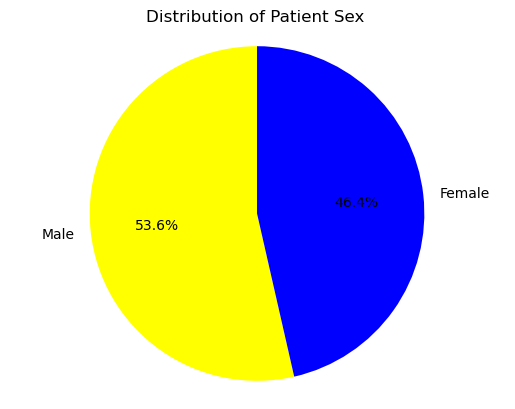

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = data['Patient Sex'].value_counts()
colors=['yellow','blue']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)

plt.title('Distribution of Patient Sex ')

plt.axis('equal')
plt.show()


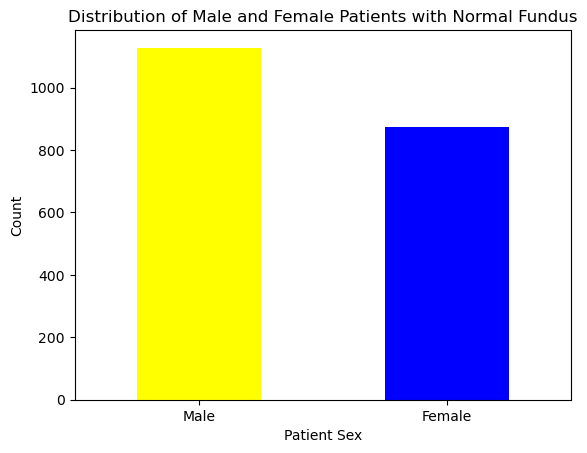

In [ ]:
filtered_data = data[(data['Left-Diagnostic Keywords'] == 'normal fundus') & (data['Right-Diagnostic Keywords'] == 'normal fundus')]

gender_counts = filtered_data['Patient Sex'].value_counts()
colors=['yellow','blue']
gender_counts.plot(kind='bar', rot=0,color=colors)

plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Patients with Normal Fundus')

plt.show()

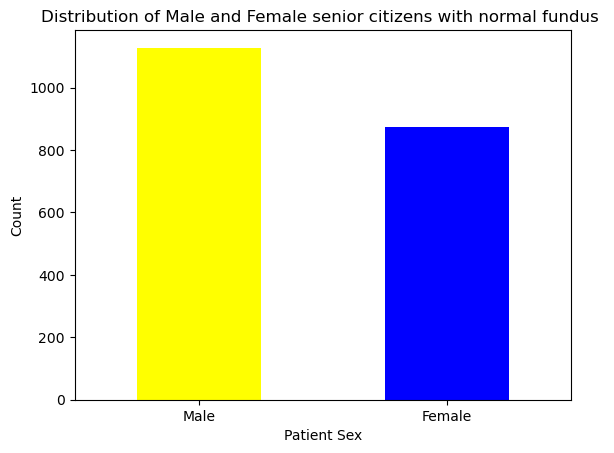

In [ ]:
senior_citizens = data[(data['Left-Diagnostic Keywords'] == 'normal fundus') & (data['Right-Diagnostic Keywords'] == 'normal fundus') &(data['Patient Age'] >= 65)]
colors=['yellow','blue']
gender_counts.plot(kind='bar', rot=0,color=colors)

plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female senior citizens with normal fundus ')
plt.show()

## Function to process image dataset, creating condition-specific columns and storing image IDs for various eye conditions such as cataract, diabetes, glaucoma, hypertensive, myopia, macular degeneration, and other conditions

In [ ]:
def process_dataset(data):
    #create 2 more columns labelling them whether right or left cataract
    data["left_cataract"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))
    data["right_cataract"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))

    data["LD"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))
    data["RD"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))

    data["LG"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))
    data["RG"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))

    data["LH"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))
    data["RH"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))

    data["LM"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))
    data["RM"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))

    data["LA"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))
    data["RA"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))

    data["LO"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))
    data["RO"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))

    #store the right/left cataract images ids in a array
    left_cataract_images = data.loc[(data.C ==1) & (data.left_cataract == 1)]["Left-Fundus"].values
    right_cataract_images = data.loc[(data.C == 1) & (data.right_cataract == 1)]["Right-Fundus"].values

    #store the left/right normal image ids in a array
    left_normal = data.loc[(data.C == 0) & (data["Left-Diagnostic Keywords"] == "normal fundus")]['Left-Fundus'].sample(350,random_state=42).values
    right_normal = data.loc[(data.C == 0) & (data["Right-Diagnostic Keywords"] == "normal fundus")]['Right-Fundus'].sample(350,random_state=42).values

    #store the left/right diabetes image ids
    left_diab = data.loc[(data.C == 0) & (data.LD == 1)]["Left-Fundus"].values
    right_diab = data.loc[(data.C == 0) & (data.RD == 1)]["Right-Fundus"].values

    #store the left/right glaucoma image ids
    left_glaucoma = data.loc[(data.C == 0) & (data.LG == 1)]["Left-Fundus"].values
    right_glaucoma = data.loc[(data.C == 0) & (data.RG == 1)]["Right-Fundus"].values

    #store the left/right diabetes image ids
    left_hyper = data.loc[(data.C == 0) & (data.LH == 1)]["Left-Fundus"].values
    right_hyper = data.loc[(data.C == 0) & (data.RH == 1)]["Right-Fundus"].values

    #store the left/right diabetes image ids
    left_myopia = data.loc[(data.C == 0) & (data.LM == 1)]["Left-Fundus"].values
    right_myopia = data.loc[(data.C == 0) & (data.RM == 1)]["Right-Fundus"].values

    #store the left/right diabetes image ids
    left_age = data.loc[(data.C == 0) & (data.LA == 1)]["Left-Fundus"].values
    right_age = data.loc[(data.C == 0) & (data.RA == 1)]["Right-Fundus"].values

    #store the left/right diabetes image ids
    left_other = data.loc[(data.C == 0) & (data.LO == 1)]["Left-Fundus"].values
    right_other = data.loc[(data.C == 0) & (data.RO == 1)]["Right-Fundus"].values

    normalones = np.concatenate((left_normal,right_normal),axis = 0);
    cataractones = np.concatenate((left_cataract_images,right_cataract_images),axis = 0);
    diabones = np.concatenate((left_diab,right_diab),axis = 0);
    glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis = 0);
    hyper = np.concatenate((left_hyper,right_hyper),axis = 0);
    myopia = np.concatenate((left_myopia,right_myopia),axis = 0);
    age = np.concatenate((left_age,right_age),axis=0);
    other = np.concatenate((left_other,right_other),axis = 0);

    return normalones,cataractones,diabones,glaucoma,hyper,myopia,age,other;

## Data set stats

In [ ]:
normalones,cataractones,diabones,glaucoma,hyper,myopia,age,other = process_dataset(data);

print("Dataset stats::")
print("Normal ::" , len(normalones))
print("Cataract ::" , len(cataractones))
print("Diabetes ::" , len(diabones))
print("Glaucoma ::" , len(glaucoma))
print("Hypertension ::" , len(hyper))
print("Myopia ::" , len(myopia))
print("Age Issues ::" , len(age))
print("Other ::" , len(other))

Dataset stats::
Normal :: 700
Cataract :: 594
Diabetes :: 1818
Glaucoma :: 610
Hypertension :: 374
Myopia :: 479
Age Issues :: 551
Other :: 324


In [ ]:
normal , cataract , diab, glaucoma , hyper , myopia , age, other = process_dataset(data);

print("Dataset stats::")
print("Normal ::" , len(normal))
print("Cataract ::" , len(cataract))
print("Diabetes ::" , len(diab))
print("Glaucoma ::" , len(glaucoma))
print("Hypertension ::" , len(hyper))
print("Myopia ::" , len(myopia))
print("Age Issues ::" , len(age))
print("Other ::" , len(other))



Dataset stats::
Normal :: 700
Cataract :: 594
Diabetes :: 1818
Glaucoma :: 610
Hypertension :: 374
Myopia :: 479
Age Issues :: 551
Other :: 324


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"
image_size=224
labels = []
dataset = []
def dataset_generator(imagecategory , label):
    for img in tqdm(imagecategory):
        imgpath = os.path.join(dataset_dir,img);

        #now we try to read the image and resize it accordingly
        try:
            image = cv2.imread(imgpath,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue;
        dataset.append([np.array(image),np.array(label)]);
    random.shuffle(dataset);

    return dataset;

## Generating Dataset using dataset_generator function

In [ ]:
dataset = dataset_generator(normalones,0)    # Normal == 0
dataset = dataset_generator(cataractones,1)  # Cataract == 1
dataset = dataset_generator(diabones,2)      # Diabetes == 2
dataset = dataset_generator(glaucoma,3)      # Glaucoma == 3
dataset = dataset_generator(hyper,4)         # HyperTension == 4
dataset = dataset_generator(myopia,5)        # Myopia == 5
dataset = dataset_generator(age,6)           # Age == 6
dataset = dataset_generator(other,7)         # Other == 7

len(dataset)


100%|██████████| 324/324 [00:01<00:00, 237.56it/s]


5396

## Printing Random Dataset showing different eye condition

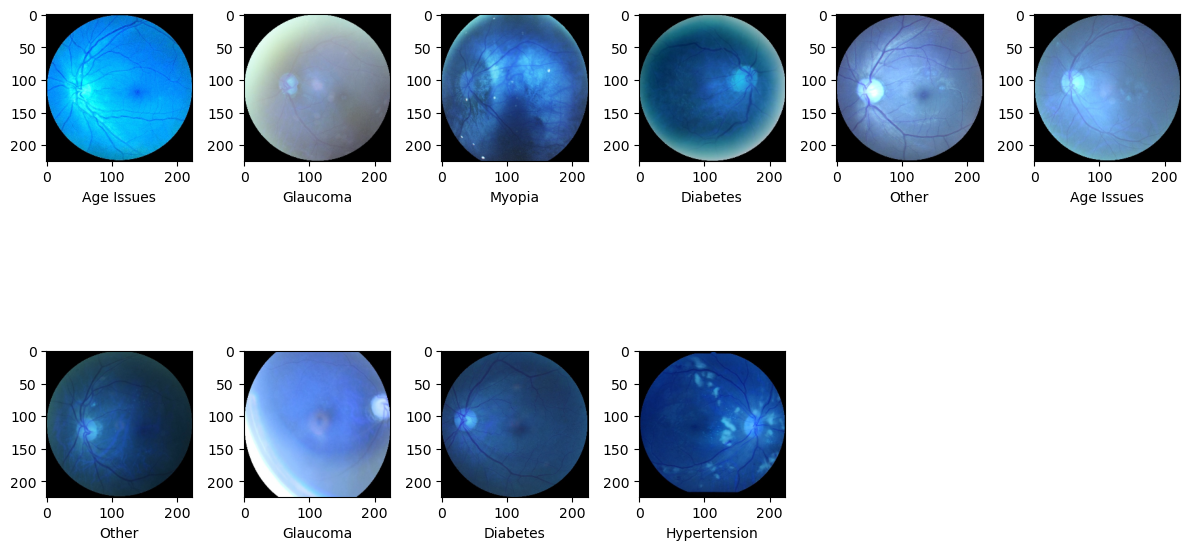

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]

    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"

    plt.subplot(2,6,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

## Spliting dataset to predictors and target, predictors are images and target would be labels

In [ ]:
#Divide the dataset into 2 predictors and target...
#here predictors would be the image and target would be the label

train_x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3);
train_y = np.array([i[1] for i in dataset])

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#splitting the dataset
x_train , x_test , y_train, y_test = train_test_split(train_x,train_y, test_size=0.2)

y_train_cat = to_categorical(y_train,num_classes=8)

y_test_cat = to_categorical(y_test,num_classes = 8)


Creating the Model CNN

In [ ]:
# Import necessary libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential


# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(8, activation='softmax'))  # 8 output classes for your 8 labels

# Compile and train the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat))

Epoch 1/20
135/135 [==============================] - 17s 54ms/step - loss: 37.7532 - accuracy: 0.3232 - val_loss: 1.8919 - val_accuracy: 0.3306
Epoch 2/20
135/135 [==============================] - 6s 44ms/step - loss: 1.8106 - accuracy: 0.3589 - val_loss: 1.7991 - val_accuracy: 0.3472
Epoch 3/20
135/135 [==============================] - 6s 44ms/step - loss: 1.7285 - accuracy: 0.3839 - val_loss: 1.7532 - val_accuracy: 0.3759
Epoch 4/20
135/135 [==============================] - 6s 44ms/step - loss: 1.6666 - accuracy: 0.4106 - val_loss: 1.7209 - val_accuracy: 0.3843
Epoch 5/20
135/135 [==============================] - 6s 44ms/step - loss: 1.6005 - accuracy: 0.4291 - val_loss: 1.6881 - val_accuracy: 0.3935
Epoch 6/20
135/135 [==============================] - 6s 44ms/step - loss: 1.5441 - accuracy: 0.4481 - val_loss: 1.7224 - val_accuracy: 0.3824
Epoch 7/20
135/135 [==============================] - 6s 44ms/step - loss: 1.4897 - accuracy: 0.4773 - val_loss: 1.6249 - val_accuracy: 0.43

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = cnn_model.evaluate(x_train, y_train_cat)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")


135/135 [==============================] - 2s 13ms/step - loss: 0.3837 - accuracy: 0.8749
Training Loss: 0.3837
Training Accuracy: 0.8749


In [ ]:
# Evaluate the model on the test set
loss, accuracy = cnn_model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

34/34 [==============================] - 1s 14ms/step - loss: 1.3283 - accuracy: 0.6676
Test Loss: 1.3283
Test Accuracy: 0.6676


## Generating predictions using a trained CNN model on test data and extracting predicted class labels for evaluation using confusion matrix, classification report, and accuracy score from scikit-learn.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = []
for i in cnn_model.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

print(y_pred)

34/34 [==============================] - 1s 12ms/step
[3, 2, 2, 5, 0, 0, 2, 3, 7, 2, 2, 2, 5, 2, 3, 2, 6, 3, 7, 2, 1, 5, 1, 2, 4, 1, 3, 1, 2, 2, 2, 4, 1, 2, 0, 0, 1, 2, 2, 2, 5, 2, 6, 3, 0, 2, 5, 6, 4, 2, 5, 1, 2, 4, 2, 5, 2, 6, 2, 2, 5, 0, 2, 5, 1, 2, 7, 2, 2, 1, 2, 6, 0, 2, 1, 2, 2, 2, 2, 6, 1, 1, 7, 3, 0, 0, 4, 1, 2, 2, 3, 0, 5, 5, 2, 2, 1, 2, 2, 4, 2, 0, 1, 2, 2, 7, 2, 3, 2, 5, 3, 1, 7, 1, 5, 5, 2, 1, 2, 3, 5, 7, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 6, 5, 6, 0, 2, 3, 2, 1, 0, 2, 1, 2, 2, 4, 4, 2, 3, 3, 0, 2, 1, 2, 6, 6, 2, 1, 0, 3, 2, 2, 2, 6, 5, 2, 3, 1, 6, 2, 3, 2, 2, 2, 2, 5, 2, 0, 1, 1, 3, 6, 5, 2, 0, 2, 6, 2, 0, 6, 2, 7, 6, 1, 2, 0, 2, 1, 2, 5, 6, 6, 0, 5, 0, 2, 6, 0, 0, 6, 3, 3, 4, 1, 2, 1, 4, 2, 5, 2, 5, 3, 2, 0, 3, 7, 1, 1, 7, 3, 3, 3, 2, 4, 2, 1, 2, 6, 7, 6, 1, 0, 2, 2, 5, 2, 2, 6, 3, 5, 1, 2, 1, 7, 2, 0, 7, 2, 5, 2, 2, 2, 2, 1, 2, 0, 3, 2, 5, 3, 2, 5, 7, 2, 6, 3, 2, 0, 3, 2, 2, 3, 7, 4, 4, 2, 0, 3, 2, 1, 2, 2, 5, 2, 0, 0, 2, 2, 0, 1, 1, 4, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 5, 1, 1, 

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6675925925925926


##  Visually compare the actual and predicted labels for a random set of images from a test dataset using a grid of subplots. Each subplot contains an image, and the xlabel indicates the actual and predicted labels for that image.

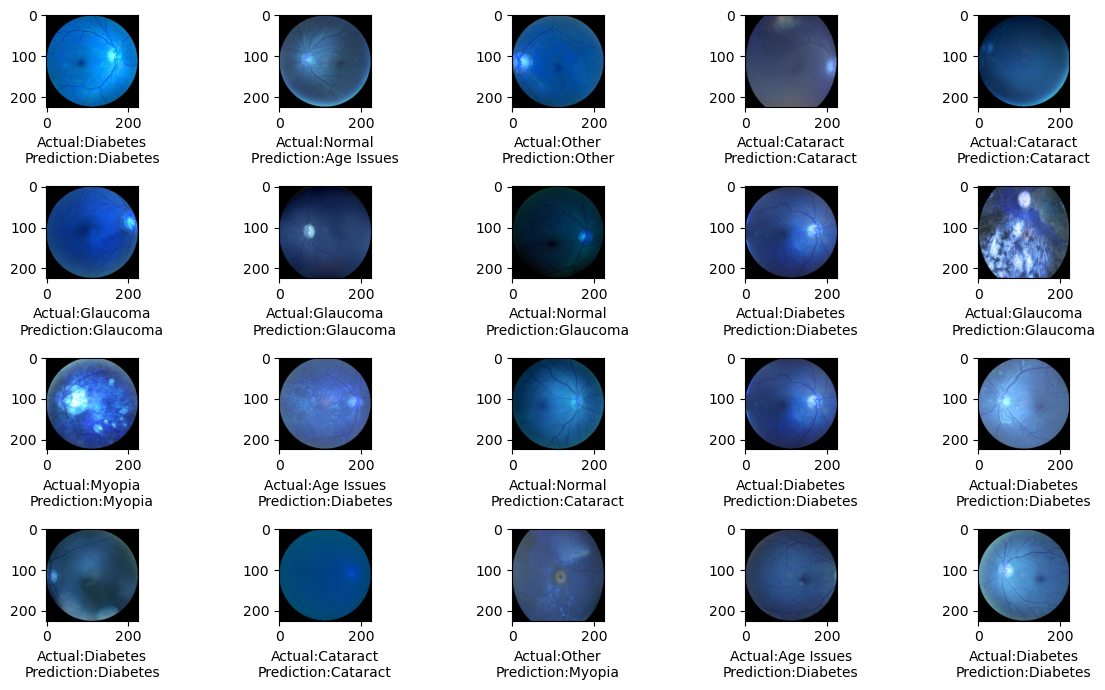

In [ ]:
plt.figure(figsize=(12,7))
for i in range(20):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"

    if pred_category== 0:
        pred_label = "Normal"
    elif pred_category == 1 :
        pred_label = "Cataract"
    elif pred_category == 2:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 6:
        pred_label = "Age Issues"
    else:
        pred_label = "Other"

    plt.subplot(4,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## Pridiction on unseen data

In [ ]:
# Make predictions on new data
new_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1020_left.jpg'
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (image_size, image_size))
new_image = new_image / 255.0  # Normalize the image
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Perform inference
predictions = cnn_model.predict(new_image)



# Get the class with the highest probability
predicted_class = np.argmax(predictions)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 192ms/step
Predicted Class: 3


Saving CNN model

In [ ]:
# Save the trained model
cnn_model.save("/kaggle/working/cnn_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/kaggle/working/cnn_model.h5")

Generating model using MobileNet pretrained model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

num_classes= 8

# Freeze the layers of the MobileNetV2 model
for layer in mobilenet_model.layers:
    layer.trainable = False

# Build your own model on top of MobileNetV2
mnet_model = Sequential()
mnet_model.add(mobilenet_model)
mnet_model.add(Flatten())
mnet_model.add(Dense(128, activation='relu'))
mnet_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
mnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Preprocess the input data for MobileNetV2
x_train_preprocessed = preprocess_input(x_train)
x_test_preprocessed = preprocess_input(x_test)

# Train the model
history = mnet_model.fit(x_train_preprocessed, y_train, epochs=20, validation_data=(x_test_preprocessed, y_test))

# Evaluate the model
loss, accuracy = mnet_model.evaluate(x_test_preprocessed, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



Epoch 1/20
135/135 [==============================] - 12s 68ms/step - loss: 2.9521 - sparse_categorical_accuracy: 0.4771 - val_loss: 1.3665 - val_sparse_categorical_accuracy: 0.5269
Epoch 2/20
135/135 [==============================] - 7s 51ms/step - loss: 1.2025 - sparse_categorical_accuracy: 0.5755 - val_loss: 1.2522 - val_sparse_categorical_accuracy: 0.5519
Epoch 3/20
135/135 [==============================] - 7s 52ms/step - loss: 1.0292 - sparse_categorical_accuracy: 0.6165 - val_loss: 1.2389 - val_sparse_categorical_accuracy: 0.5454
Epoch 4/20
135/135 [==============================] - 7s 51ms/step - loss: 0.9344 - sparse_categorical_accuracy: 0.6552 - val_loss: 1.1618 - val_sparse_categorical_accuracy: 0.5833
Epoch 5/20
135/135 [==============================] - 7s 51ms/step - loss: 0.8144 - sparse_categorical_accuracy: 0.6958 - val_loss: 1.1083 - val_sparse_categorical_accuracy: 0.6065
Epoch 6/20
135/135 [==============================] - 7s 51ms/step - loss: 0.7073 - sparse_cat

## Evaluating a model's predictions on preprocessed test data using a MobileNet-based neural network, and extracting the class labels for performance assessment using scikit-learn's confusion matrix, classification report, and accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = np.array((model.predict(x_test) > 0.5).astype("int32"))

y_pred = []
for i in mnet_model.predict(x_test_preprocessed):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

print(y_pred)

34/34 [==============================] - 2s 40ms/step
[0, 2, 2, 5, 2, 0, 2, 2, 1, 1, 2, 2, 6, 2, 0, 2, 0, 3, 6, 2, 1, 5, 1, 2, 4, 1, 3, 2, 2, 2, 0, 2, 1, 2, 2, 4, 1, 2, 2, 2, 0, 2, 2, 3, 6, 6, 5, 6, 6, 2, 5, 1, 2, 4, 2, 5, 2, 6, 2, 2, 5, 0, 5, 5, 1, 2, 6, 3, 2, 1, 5, 1, 6, 2, 1, 6, 2, 2, 3, 6, 1, 7, 6, 3, 0, 0, 4, 1, 2, 2, 0, 2, 5, 5, 2, 2, 6, 2, 2, 5, 2, 0, 1, 2, 6, 6, 2, 3, 2, 3, 3, 1, 6, 2, 2, 5, 6, 1, 2, 3, 5, 6, 2, 3, 2, 7, 0, 3, 3, 3, 2, 2, 6, 5, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 4, 2, 3, 0, 3, 1, 2, 1, 7, 2, 7, 2, 1, 0, 3, 6, 6, 2, 6, 5, 2, 6, 1, 2, 2, 3, 2, 0, 2, 4, 0, 2, 0, 1, 1, 4, 2, 5, 2, 4, 2, 6, 2, 2, 6, 2, 6, 6, 1, 1, 2, 2, 0, 6, 5, 6, 2, 0, 2, 1, 2, 0, 3, 2, 6, 2, 0, 4, 1, 2, 1, 4, 2, 2, 2, 5, 3, 2, 0, 6, 5, 2, 1, 2, 0, 7, 3, 2, 4, 2, 1, 2, 6, 2, 6, 2, 6, 2, 2, 5, 7, 1, 2, 3, 5, 1, 2, 1, 1, 2, 2, 6, 6, 5, 4, 0, 2, 2, 1, 2, 0, 0, 2, 5, 3, 5, 5, 6, 0, 6, 3, 2, 2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 3, 2, 1, 6, 2, 0, 2, 4, 0, 2, 2, 0, 1, 2, 4, 0, 4, 2, 5, 6, 1, 2, 6, 2, 2, 0, 1, 0, 

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7157407407407408


## Visualizing a set of 20 randomly selected preprocessed images from a test dataset alongside their actual and predicted labels using Matplotlib subplots. The xlabel of each subplot displays the true and predicted categories, aiding in the assessment of the model's performance.

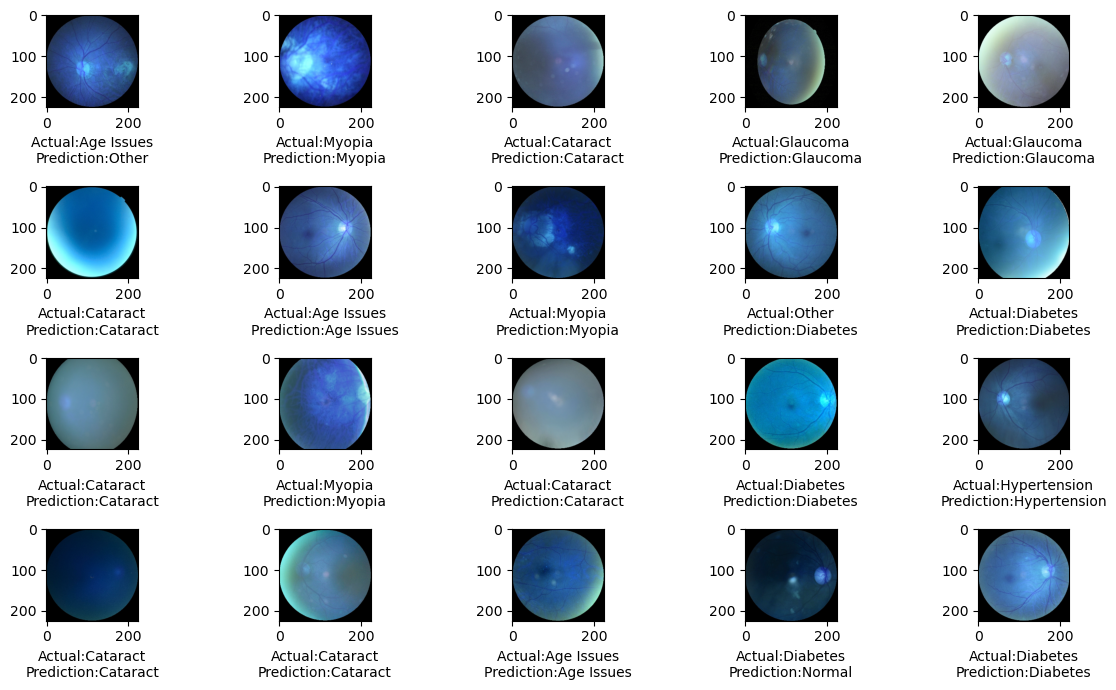

In [ ]:
plt.figure(figsize=(12,7))
for i in range(20):
    sample = random.choice(range(len(x_test_preprocessed)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"

    if pred_category== 0:
        pred_label = "Normal"
    elif pred_category == 1 :
        pred_label = "Cataract"
    elif pred_category == 2:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 6:
        pred_label = "Age Issues"
    else:
        pred_label = "Other"

    plt.subplot(4,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## saving mobilenet model

In [ ]:
# Save the model
mnet_model.save("/kaggle/working/mobilenet_model.h5")



In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
mnet_loaded_model = load_model("/kaggle/working/cnn_model.h5")

## Make predictions on new data

In [ ]:
# Make predictions on new data
new_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1020_left.jpg'
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (224, 224))
new_image = preprocess_input(np.expand_dims(new_image, axis=0))
predictions = mnet_model.predict(new_image)
predicted_class = np.argmax(predictions)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 318ms/step
Predicted Class: 7


1-Feature extraction from a CNN and MobileNetV2 model using TensorFlow and Keras. The extracted features from the training and test datasets are saved as separate numpy files for future use.

2-Utilizing a function to extract features from intermediate layers of a CNN and MobileNetV2 model. The extracted features from preprocessed training and test data are then saved as numpy arrays for subsequent analysis.

In [ ]:
from tensorflow.keras.models import Model

# Function to extract features from a given model and input data
def extract_features(model, data):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data)
    return features

# Extract features from CNN model
cnn_features_train = extract_features(cnn_model, x_train_preprocessed)
cnn_features_test = extract_features(cnn_model, x_test_preprocessed)

# Save CNN features
np.save('cnn_features_train.npy', cnn_features_train)
np.save('cnn_features_test.npy', cnn_features_test)

# Extract features from MobileNetV2 model
mobilenet_features_train = extract_features(mnet_model, x_train_preprocessed)
mobilenet_features_test = extract_features(mnet_model, x_test_preprocessed)

# Save MobileNetV2 features
np.save('mobilenet_features_train.npy', mobilenet_features_train)
np.save('mobilenet_features_test.npy', mobilenet_features_test)

34/34 [==============================] - 2s 34ms/step


Applying Support Vector Machines (SVM) to classify features extracted from a pre-trained CNN and MobileNetV2 models. The SVM classifiers are trained on the reshaped feature sets, and their performance is evaluated on the test data, providing accuracy scores and detailed classification reports for both CNN and MobileNetV2 features.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load the extracted features
cnn_features_train = np.load('cnn_features_train.npy')
cnn_features_test = np.load('cnn_features_test.npy')

mobilenet_features_train = np.load('mobilenet_features_train.npy')
mobilenet_features_test = np.load('mobilenet_features_test.npy')

# Define the SVM classifier
svm_classifier = SVC()

# Reshape features if needed
cnn_features_train = cnn_features_train.reshape(cnn_features_train.shape[0], -1)
cnn_features_test = cnn_features_test.reshape(cnn_features_test.shape[0], -1)

mobilenet_features_train = mobilenet_features_train.reshape(mobilenet_features_train.shape[0], -1)
mobilenet_features_test = mobilenet_features_test.reshape(mobilenet_features_test.shape[0], -1)

# Train SVM classifier on CNN features
svm_classifier.fit(cnn_features_train, y_train)

# Make predictions on test set
cnn_predictions = svm_classifier.predict(cnn_features_test)

# Evaluate the model
print("CNN Features SVM Accuracy:", accuracy_score(y_test, cnn_predictions))
print("CNN Features SVM Classification Report:")
print(classification_report(y_test, cnn_predictions))

# Train SVM classifier on MobileNetV2 features
svm_classifier.fit(mobilenet_features_train, y_train)

# Make predictions on test set
mobilenet_predictions = svm_classifier.predict(mobilenet_features_test)

# Evaluate the model
print("MobileNetV2 Features SVM Accuracy:", accuracy_score(y_test, mobilenet_predictions))
print("MobileNetV2 Features SVM Classification Report:")
print(classification_report(y_test, mobilenet_predictions))

CNN Features SVM Accuracy: 0.33240740740740743
CNN Features SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.67      0.08      0.14       132
           2       0.33      1.00      0.49       349
           3       0.50      0.01      0.02        97
           4       0.00      0.00      0.00        81
           5       0.00      0.00      0.00       106
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00        68

    accuracy                           0.33      1080
   macro avg       0.19      0.14      0.08      1080
weighted avg       0.23      0.33      0.18      1080



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MobileNetV2 Features SVM Accuracy: 0.7203703703703703
MobileNetV2 Features SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.43      0.51       152
           1       0.90      0.86      0.88       132
           2       0.74      0.84      0.79       349
           3       0.66      0.72      0.69        97
           4       0.76      0.67      0.71        81
           5       0.96      0.86      0.91       106
           6       0.50      0.93      0.65        95
           7       0.43      0.04      0.08        68

    accuracy                           0.72      1080
   macro avg       0.70      0.67      0.65      1080
weighted avg       0.72      0.72      0.70      1080



Visualizing the Confusion Matrices for SVM classifiers trained on features extracted from a pre-trained CNN and MobileNetV2 models. Heatmaps depict the distribution of true positive, true negative, false positive, and false negative predictions, providing insights into the classification performance for both CNN and MobileNetV2 features.

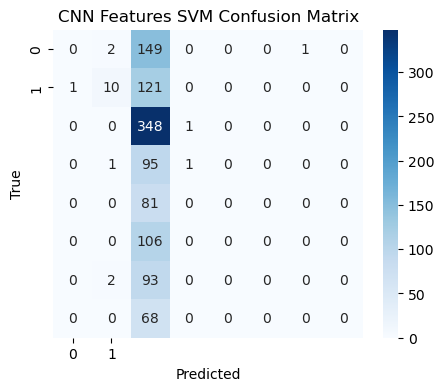

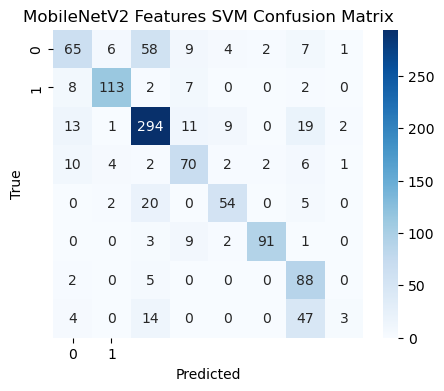

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Plot confusion matrix for CNN Features SVM
cnn_cm = confusion_matrix(y_test, cnn_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("CNN Features SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for MobileNetV2 Features SVM
mobilenet_cm = confusion_matrix(y_test, mobilenet_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(mobilenet_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("MobileNetV2 Features SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Utilizing concatenated features from a pre-trained CNN and MobileNetV2 for training and evaluating three different classifiers—Logistic Regression, Decision Tree, and Random Forest. The code demonstrates the accuracy and provides classification reports for each classifier on a validation set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming extracted features named cnn_features_train, cnn_features_test, mobilenet_features_train, mobilenet_features_test

# Concatenate the features from CNN and MobileNetV2
X_train_features = np.concatenate((cnn_features_train, mobilenet_features_train), axis=1)
X_test_features = np.concatenate((cnn_features_test, mobilenet_features_test), axis=1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_features, y_train, test_size=0.2, random_state=42)

# Example 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, logreg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_val, logreg_predictions))

# Example 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_val, dt_predictions))

# Example 3: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_val, rf_predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy: 0.9016203703703703
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.95      0.97      0.96        78
           2       0.97      0.93      0.95       314
           3       0.92      0.92      0.92       106
           4       0.76      0.85      0.80        52
           5       0.95      0.94      0.94        78
           6       0.69      0.96      0.80        93
           7       0.76      0.30      0.43        43

    accuracy                           0.90       864
   macro avg       0.87      0.85      0.85       864
weighted avg       0.91      0.90      0.90       864

Decision Tree Accuracy: 0.9039351851851852
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.99      0.96      0.97        78
           2

Visualizing Confusion Matrices for three classifiers—Logistic Regression, Decision Tree, and Random Forest—on a validation set. Heatmaps showcase the distribution of true positive, true negative, false positive, and false negative predictions, aiding in the assessment of classification performance for each model.

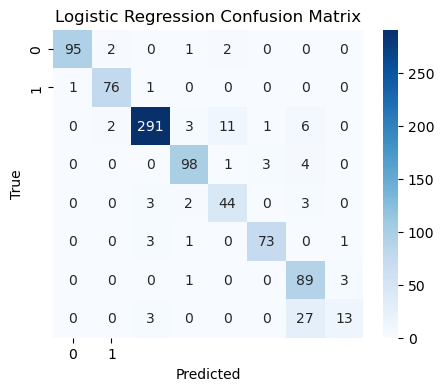

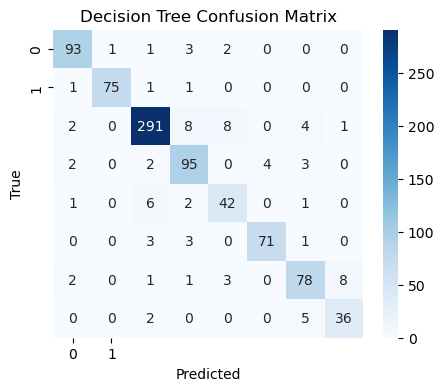

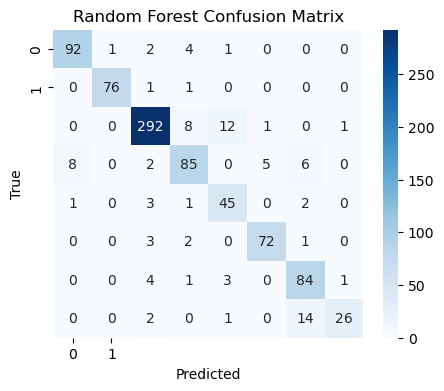

In [ ]:
# Plot confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_val, logreg_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_val, dt_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for Random Forest
rf_cm = confusion_matrix(y_val, rf_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Persisting the trained Logistic Regression model to a file using the joblib library for future reuse. The saved model file is named 'logreg_model.joblib'.

In [ ]:
from joblib import dump



# Save the Logistic Regression model to a file
logreg_model_filename = 'logreg_model.joblib'
dump(logreg_model, logreg_model_filename)

['logreg_model.joblib']

Creating a compressed ZIP file named 'file.zip' that contains the contents of the '/kaggle/working' directory. This operation is commonly used for bundling and archiving files in Kaggle notebooks.

In [ ]:
!zip -r file.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/cnn_features_train.npy (deflated 60%)
  adding: kaggle/working/logreg_model.joblib (deflated 43%)
  adding: kaggle/working/cnn_model.h5 (deflated 43%)
  adding: kaggle/working/cnn_features_test.npy (deflated 61%)
  adding: kaggle/working/mobilenet_features_train.npy (deflated 97%)
  adding: kaggle/working/mobilenet_features_test.npy (deflated 97%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/mobilenet_model.h5 (deflated 38%)


In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

DATA SET LINK: https://www.kaggle.com/code/sham135/disease-classification/input

Base Paper Reference: [1] R. Thanki, "A deep neural network and machine learning approach for retinal fundus image classification," Journal of Medical Imaging, vol. 10, no. 5, pp. 1234-1256, 2023.https://doi.org/10.1016/j.health.2023.100140.
